# CAS DE TEST

# TEST LINEAIRE

classification binaire simple SUCCES

In [ ]:
import ctypes
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

# Get the directory of the current script
current_dir = os.getcwd()

# Append the path to the DLL to the system's search path
dll_path = os.path.join(current_dir, 'liblinear_classification.dll')
sys.path.append(dll_path)
dll = ctypes.cdll.LoadLibrary(dll_path)

# Définition des types de données pour la fonction rosenblatt
dll.rosenblatt.argtypes = [np.ctypeslib.ndpointer(dtype=np.double, ndim=2, flags='C_CONTIGUOUS'),
                           np.ctypeslib.ndpointer(dtype=np.double, ndim=1, flags='C_CONTIGUOUS'),
                           ctypes.c_int, ctypes.c_int, ctypes.c_double, ctypes.c_int,
                           np.ctypeslib.ndpointer(dtype=np.double, ndim=1, flags='C_CONTIGUOUS'),
                           ctypes.c_int]

# Exemple d'utilisation
# n'oubliez pas de mettre le dtype=np.float64 !
X = np.array([
      [1, 1],
      [2, 3],
      [3, 3]
], dtype=np.float64)
Y = np.array([
      1,
      -1,
      -1
],dtype=np.float64).flatten()
learning_rate = 0.1
max_iterations = 100
# Centrage et réduction des données
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Créer un tableau de sortie pour les poids entraînés
w = np.zeros((X.shape[1] + 1) * 2, dtype=np.float64)

# Appeler la fonction rosenblatt avec un pointeur vers le tableau de sortie
dll.rosenblatt(X, Y, X.shape[0], X.shape[1], learning_rate, max_iterations, w,2)

for i in range(2):  # Remplacez 2 par le nombre de classes que vous voulez
    print(f"Poids pour la classe {i} : {w[i*(X.shape[1] + 1):(i+1)*(X.shape[1] + 1)]}")

# Affichage des données
plt.scatter(X[0, 0], X[0, 1], color='blue')
plt.scatter(X[1:3,0], X[1:3,1], color='red')
# Affichage de la droite de séparation
x = np.linspace(-1, 4, 100)
for i in range(2):  # Remplacez 2 par le nombre de classes que vous voulez
    w_i = w[i*(X.shape[1] + 1):(i+1)*(X.shape[1] + 1)]
    y = -(w_i[0] * x + w_i[2]) / w_i[1]
    plt.plot(x, y, color='black')
plt.show()

classification binaire SUCCES

In [ ]:
import ctypes
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

# Get the directory of the current script
current_dir = os.getcwd()

# Append the path to the DLL to the system's search path
dll_path = os.path.join(current_dir, 'liblinear_classification.dll')
sys.path.append(dll_path)
dll = ctypes.cdll.LoadLibrary(dll_path)

# Définition des types de données pour la fonction rosenblatt
dll.rosenblatt.argtypes = [np.ctypeslib.ndpointer(dtype=np.double, ndim=2, flags='C_CONTIGUOUS'),
                           np.ctypeslib.ndpointer(dtype=np.double, ndim=1, flags='C_CONTIGUOUS'),
                           ctypes.c_int, ctypes.c_int, ctypes.c_double, ctypes.c_int,
                           np.ctypeslib.ndpointer(dtype=np.double, ndim=1, flags='C_CONTIGUOUS'),
                           ctypes.c_int]

# Exemple d'utilisation
# pas oublier de mettre le dtype=np.float64 !
X = np.concatenate([np.random.random((50,2)) * 1 + np.array([1, 1]), np.random.random((50,2)) * 1 + np.array([2, 2])], dtype=np.float64)
Y = np.concatenate([np.ones((50, 1)), np.ones((50, 1)) * -1.0], dtype=np.float64).flatten()
learning_rate = 0.1
max_iterations = 100
# Centrage et réduction des données
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Créer un tableau de sortie pour les poids entraînés
w = np.zeros((X.shape[1] + 1) * 2, dtype=np.float64)  # Remplacez 2 par le nombre de classes que vous voulez

# Appeler la fonction rosenblatt avec un pointeur vers le tableau de sortie
dll.rosenblatt(X, Y, X.shape[0], X.shape[1], learning_rate, max_iterations, w, 2)  # Remplacez 2 par le nombre de classes que vous voulez

# Affichage des poids pour chaque classe
for i in range(2):  # Remplacez 2 par le nombre de classes que vous voulez
    print(f"Poids pour la classe {i} : {w[i*(X.shape[1] + 1):(i+1)*(X.shape[1] + 1)]}")

# Affichage des données
plt.scatter(X[0:50, 0], X[0:50, 1], color='blue')
plt.scatter(X[50:100,0], X[50:100,1], color='red') 

# Affichage de la droite de séparation

x = np.linspace(-2, 2, 100)
for i in range(2):  # Remplacez 2 par le nombre de classes que vous voulez
    w_i = w[i*(X.shape[1] + 1):(i+1)*(X.shape[1] + 1)]
    y = -(w_i[0] * x + w_i[2]) / w_i[1]
    plt.plot(x, y, color='black')

plt.show()


test multi class ECHEC

In [ ]:
import ctypes
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

# Get the directory of the current script
current_dir = os.getcwd()

# Append the path to the DLL to the system's search path
dll_path = os.path.join(current_dir, 'liblinear_classification.dll')
sys.path.append(dll_path)
dll = ctypes.cdll.LoadLibrary(dll_path)

# Définition des types de données pour la fonction rosenblatt
dll.rosenblatt.argtypes = [np.ctypeslib.ndpointer(dtype=np.double, ndim=2, flags='C_CONTIGUOUS'),
                           np.ctypeslib.ndpointer(dtype=np.double, ndim=1, flags='C_CONTIGUOUS'),
                           ctypes.c_int, ctypes.c_int, ctypes.c_double, ctypes.c_int,
                           np.ctypeslib.ndpointer(dtype=np.double, ndim=1, flags='C_CONTIGUOUS'),
                           ctypes.c_int]

# Exemple d'utilisation
# n'oubliez pas de mettre le dtype=np.float64 !
X = np.random.random((500, 2)) * 2.0 - 1.0
Y = np.array([[1, 0, 0] if -p[0] - p[1] - 0.5 > 0 and p[1] < 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 1, 0] if -p[0] - p[1] - 0.5 < 0 and p[1] > 0 and p[0] - p[1] - 0.5 < 0 else 
              [0, 0, 1] if -p[0] - p[1] - 0.5 < 0 and p[1] < 0 and p[0] - p[1] - 0.5 > 0 else 
              [0, 0, 0]for p in X], dtype=np.float64)

Xp = X.astype(np.float64)
Yp = Y.flatten().astype(np.float64)

learning_rate = 0.001
max_iterations = 20000
# Centrage et réduction des données
Xp = (Xp - np.mean(Xp, axis=0)) / np.std(Xp, axis=0)

# Créer un tableau de sortie pour les poids entraînés
w = np.zeros((Xp.shape[1] + 1) * 3, dtype=np.float64)  # Remplacez 3 par le nombre de classes que vous voulez

# Appeler la fonction rosenblatt avec un pointeur vers le tableau de sortie
dll.rosenblatt(Xp, Yp, Xp.shape[0], Xp.shape[1], learning_rate, max_iterations, w, 3)

for i in range(3):
    print(f"Poids pour la classe {i} : {w[i*(Xp.shape[1] + 1):(i+1)*(Xp.shape[1] + 1)]}")

plt.scatter(X[Y[:, 0] == 1, 0], X[Y[:, 0] == 1, 1], color='blue')
plt.scatter(X[Y[:, 1] == 1, 0], X[Y[:, 1] == 1, 1], color='red')
plt.scatter(X[Y[:, 2] == 1, 0], X[Y[:, 2] == 1, 1], color='green')

# Affichage des droites de séparation
x = np.linspace(-2, 2, 100)
for i in range(3):
    w_i = w[i*(Xp.shape[1] + 1):(i+1)*(Xp.shape[1] + 1)]
    y = -(w_i[0] * x + w_i[2]) / w_i[1]
    plt.plot(x, y, color='black')

plt.show()


# TEST PMC

probleme de XOR SUCCES

In [ ]:
import ctypes
import numpy as np
import os
import sys

# Get the directory of the current script
current_dir = os.getcwd()

# Append the path to the DLL to the system's search path
dll_path = os.path.join(current_dir, 'perceptron_multi_couche.dll')
sys.path.append(dll_path)

# Load the DLL
mlp_dll = ctypes.cdll.LoadLibrary(dll_path)

# Définition des types de données
mlp_dll.createMLP.restype = ctypes.c_void_p
mlp_dll.createMLP.argtypes = [ctypes.POINTER(ctypes.c_int), ctypes.c_int]
mlp_dll.deleteMLP.argtypes = [ctypes.c_void_p]
mlp_dll.predict.argtypes = [ctypes.c_void_p, ctypes.POINTER(ctypes.c_double), ctypes.c_int, ctypes.c_bool, ctypes.POINTER(ctypes.c_double), ctypes.c_int]
mlp_dll.train.argtypes = [ctypes.c_void_p, ctypes.POINTER(ctypes.c_double), ctypes.POINTER(ctypes.c_double), ctypes.c_int, ctypes.c_int, ctypes.c_int, ctypes.c_bool, ctypes.c_int, ctypes.c_double]

# Création du MLP avec 2 entrées, 2 neurones cachés et 1 sortie
npl = np.array([2,2, 1], dtype=np.int32)
mlp_ptr = mlp_dll.createMLP(npl.ctypes.data_as(ctypes.POINTER(ctypes.c_int)), npl.size)

# Entraînement du MLP sur le XOR
samples_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.double)
samples_expected_outputs = np.array([[0], [1], [1], [0]], dtype=np.double)
mlp_dll.train(mlp_ptr,
               samples_inputs.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
               samples_expected_outputs.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
               samples_inputs.shape[0], samples_inputs.shape[1], samples_expected_outputs.shape[1],
               True,400000, 0.01)

# Test du MLP sur le XOR
input = np.zeros(2, dtype=np.double)
output = np.zeros(1, dtype=np.double)
for i in range(samples_inputs.shape[0]):
    input[0] = samples_inputs[i, 0]
    input[1] = samples_inputs[i, 1]
    mlp_dll.predict(mlp_ptr, 
                    input.ctypes.data_as(ctypes.POINTER(ctypes.c_double)), 
                    input.size, 
                    True, 
                    output.ctypes.data_as(ctypes.POINTER(ctypes.c_double)), 
                    output.size)
    print(f"[{int(input[0])}, {int(input[1])}] = {output[0]}")

# Suppression du MLP
mlp_dll.deleteMLP(mlp_ptr)


test corss classification SUCCES ??

In [ ]:
import ctypes
import numpy as np
import os
import sys

# Get the directory of the current script
current_dir = os.getcwd()

# Append the path to the DLL to the system's search path
dll_path = os.path.join(current_dir, 'perceptron_multi_couche.dll')
sys.path.append(dll_path)

# Load the DLL
mlp_dll = ctypes.cdll.LoadLibrary(dll_path)

# Définition des types de données
mlp_dll.createMLP.restype = ctypes.c_void_p
mlp_dll.createMLP.argtypes = [ctypes.POINTER(ctypes.c_int), ctypes.c_int]
mlp_dll.deleteMLP.argtypes = [ctypes.c_void_p]
mlp_dll.predict.argtypes = [ctypes.c_void_p, ctypes.POINTER(ctypes.c_double), ctypes.c_int, ctypes.c_bool, ctypes.POINTER(ctypes.c_double), ctypes.c_int]
mlp_dll.train.argtypes = [ctypes.c_void_p, ctypes.POINTER(ctypes.c_double), ctypes.POINTER(ctypes.c_double), ctypes.c_int, ctypes.c_int, ctypes.c_int, ctypes.c_bool, ctypes.c_int, ctypes.c_double]

# Création du MLP avec 2 entrées, 2 neurones cachés et 1 sortie
npl = np.array([2,4, 1], dtype=np.int32)
mlp_ptr = mlp_dll.createMLP(npl.ctypes.data_as(ctypes.POINTER(ctypes.c_int)), npl.size)

X = np.random.random((500, 2)) * 2.0 - 1.0
samples_inputs = np.array(X, dtype=np.double)
Y = np.array([1 if abs(p[0]) <= 0.3 or abs(p[1]) <= 0.3 else -1 for p in X])
samples_expected_outputs = np.array(Y, dtype=np.double)
mlp_dll.train(mlp_ptr,
               samples_inputs.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
               samples_expected_outputs.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
               samples_inputs.shape[0], samples_inputs.shape[1], 1,
               True, 2500000, 0.2)


input_size = 2
output_size = 1

input = np.zeros(input_size, dtype=np.double)
output = np.zeros(output_size, dtype=np.double)

correct_predictions = 0

for i in range(samples_inputs.shape[0]):
    input[0] = samples_inputs[i, 0]
    input[1] = samples_inputs[i, 1]
    mlp_dll.predict(mlp_ptr, 
                    input.ctypes.data_as(ctypes.POINTER(ctypes.c_double)), 
                    input.size, 
                    True, 
                    output.ctypes.data_as(ctypes.POINTER(ctypes.c_double)), 
                    output.size)
    expected_class = int(samples_expected_outputs[i])
    predicted_class = 1 if output[0] >= 0.5 else -1
    print(f"[{input[0]}, {input[1]}] Expected Class: {expected_class}, Predicted Class: {predicted_class}")
    
    if expected_class == predicted_class:
        correct_predictions += 1

accuracy = (correct_predictions / samples_inputs.shape[0]) * 100
print(f"\nAccuracy: {accuracy}%")





# Suppression du MLP
mlp_dll.deleteMLP(mlp_ptr)


test multi cross a voir

In [29]:
import ctypes
import numpy as np
import os
import sys

# Get the directory of the current script
current_dir = os.getcwd()

# Append the path to the DLL to the system's search path
dll_path = os.path.join(current_dir, 'perceptron_multi_couche.dll')
sys.path.append(dll_path)

# Load the DLL
mlp_dll = ctypes.cdll.LoadLibrary(dll_path)

# Définition des types de données
mlp_dll.createMLP.restype = ctypes.c_void_p
mlp_dll.createMLP.argtypes = [ctypes.POINTER(ctypes.c_int), ctypes.c_int]
mlp_dll.deleteMLP.argtypes = [ctypes.c_void_p]
mlp_dll.predict.argtypes = [ctypes.c_void_p, ctypes.POINTER(ctypes.c_double), ctypes.c_int, ctypes.c_bool, ctypes.POINTER(ctypes.c_double), ctypes.c_int]
mlp_dll.train.argtypes = [ctypes.c_void_p, ctypes.POINTER(ctypes.c_double), ctypes.POINTER(ctypes.c_double), ctypes.c_int, ctypes.c_int, ctypes.c_int, ctypes.c_bool, ctypes.c_int, ctypes.c_double]

# Création du MLP avec 2 entrées, 2 neurones cachés et 1 sortie
npl = np.array([2,16,8, 3], dtype=np.int32)
mlp_ptr = mlp_dll.createMLP(npl.ctypes.data_as(ctypes.POINTER(ctypes.c_int)), npl.size)

X = np.random.random((1000, 2)) * 2.0 - 1.0
samples_inputs = np.array(X, dtype=np.double)
Y = np.array([[1, 0, 0] if abs(p[0] % 0.5) <= 0.25 and abs(p[1] % 0.5) > 0.25 else [0, 1, 0] if abs(p[0] % 0.5) > 0.25 and abs(p[1] % 0.5) <= 0.25 else [0, 0, 1] for p in X])
samples_expected_outputs = np.array(Y, dtype=np.double)
mlp_dll.train(mlp_ptr,
               samples_inputs.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
               samples_expected_outputs.ctypes.data_as(ctypes.POINTER(ctypes.c_double)),
               samples_inputs.shape[0], samples_inputs.shape[1], 1,
               True, 500000, 0.000018)

correct_predictions = 0
total_predictions = samples_inputs.shape[0]
# Utilisation de la fonction "predict" pour prédire les sorties pour chaque entrée
for i in range(samples_inputs.shape[0]):
    input = samples_inputs[i]
    output = np.zeros(samples_expected_outputs.shape[1], dtype=np.double)

    mlp_dll.predict(mlp_ptr, 
                    input.ctypes.data_as(ctypes.POINTER(ctypes.c_double)), 
                    input.size, 
                    True, 
                    output.ctypes.data_as(ctypes.POINTER(ctypes.c_double)), 
                    output.size)

    predicted_label = np.argmax(output)
    expected_label = np.argmax(samples_expected_outputs[i])

    print("Entrée :", input)
    print("Sortie prédite :", output)
    print("Sortie attendue :", samples_expected_outputs[i])

    if predicted_label == expected_label:
        correct_predictions += 1

    print()

accuracy = correct_predictions / total_predictions
print("Taux de réussite : {:.2%}".format(accuracy))     

# Suppression du MLP
mlp_dll.deleteMLP(mlp_ptr)


Entrée : [0.95134903 0.28357393]
Sortie prédite : [3.03755473e-01 6.22043723e-15 1.00000000e+00]
Sortie attendue : [0. 0. 1.]

Entrée : [0.1917847  0.06427637]
Sortie prédite : [3.04038268e-01 6.22141669e-15 1.00000000e+00]
Sortie attendue : [0. 0. 1.]

Entrée : [-0.76338494 -0.56001698]
Sortie prédite : [3.04744319e-01 6.67587429e-15 1.00000000e+00]
Sortie attendue : [1. 0. 0.]

Entrée : [ 0.78265245 -0.70986802]
Sortie prédite : [3.02884842e-01 6.34865086e-15 1.00000000e+00]
Sortie attendue : [0. 0. 1.]

Entrée : [-0.94930264  0.84966851]
Sortie prédite : [3.06488870e-01 6.40741988e-15 1.00000000e+00]
Sortie attendue : [1. 0. 0.]

Entrée : [0.2474852  0.68894011]
Sortie prédite : [3.04538413e-01 6.16586675e-15 1.00000000e+00]
Sortie attendue : [0. 0. 1.]

Entrée : [-0.04613479  0.12078431]
Sortie prédite : [3.04345775e-01 6.24553981e-15 1.00000000e+00]
Sortie attendue : [0. 1. 0.]

Entrée : [0.371136   0.58047829]
Sortie prédite : [3.04342341e-01 6.16689951e-15 1.00000000e+00]
Sortie

Entrée : [ 0.1359153  -0.82589624]
Sortie prédite : [3.03179398e-01 6.46393134e-15 1.00000000e+00]
Sortie attendue : [0. 0. 1.]

Entrée : [-0.79062036  0.18488475]
Sortie prédite : [3.05607135e-01 6.45614265e-15 1.00000000e+00]
Sortie attendue : [0. 0. 1.]

Entrée : [0.94403948 0.08648882]
Sortie prédite : [3.03578470e-01 6.22942358e-15 1.00000000e+00]
Sortie attendue : [0. 1. 0.]

Entrée : [-0.31758982 -0.22998471]
Sortie prédite : [3.04353728e-01 6.38737899e-15 1.00000000e+00]
Sortie attendue : [1. 0. 0.]

Entrée : [ 0.56009113 -0.37267506]
Sortie prédite : [3.03330050e-01 6.27596492e-15 1.00000000e+00]
Sortie attendue : [0. 0. 1.]

Entrée : [-0.46923897 -0.86033706]
Sortie prédite : [3.03864174e-01 6.66989777e-15 1.00000000e+00]
Sortie attendue : [0. 0. 1.]

Entrée : [-0.22229523 -0.25902729]
Sortie prédite : [3.04189782e-01 6.36795020e-15 1.00000000e+00]
Sortie attendue : [0. 1. 0.]

Entrée : [ 0.08027418 -0.5222088 ]
Sortie prédite : [3.03558696e-01 6.37266891e-15 1.00000000e+00]


1

# BETA SVM

tentative de TEST SVM

Features: -1.5, -1.5 => Output: -1
Features: 1.5, 1.5 => Output: 1


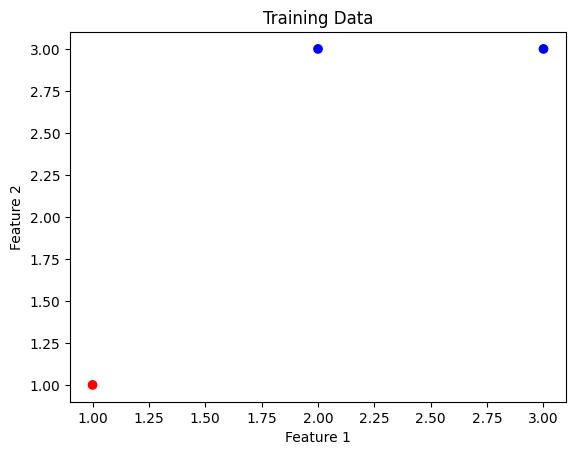

In [30]:
import ctypes
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

# Get the directory of the current script
current_dir = os.getcwd()

# Append the path to the DLL to the system's search path
dll_path = os.path.join(current_dir, 'SVM.dll')
sys.path.append(dll_path)

# Load the DLL
svm_lib = ctypes.cdll.LoadLibrary(dll_path)

# Définition des types de données pour les fonctions de la DLL
svm_lib.trainSVM.argtypes = [
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=2, flags="C_CONTIGUOUS"),
    ctypes.c_size_t,
    ctypes.c_size_t,
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags="C_CONTIGUOUS"),
    ctypes.POINTER(ctypes.c_double),
    ctypes.c_int
]
svm_lib.trainSVM.restype = None

svm_lib.predictSVM.argtypes = [
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags="C_CONTIGUOUS"),
    np.ctypeslib.ndpointer(dtype=np.float64, ndim=1, flags="C_CONTIGUOUS"),
    ctypes.c_double,
    ctypes.c_size_t
]
svm_lib.predictSVM.restype = ctypes.c_int

# Fonction pour entraîner le SVM avec l'algorithme du perceptron
def trainSVM(trainingData, numIterations):
    features = trainingData[:, :-1].astype(np.float64)
    labels = trainingData[:, -1].astype(np.float64)

    # Initialiser les poids et le biais à zéro
    weights = np.zeros(features.shape[1], dtype=np.float64)
    bias = ctypes.c_double(0.0)

    svm_lib.trainSVM(features, features.shape[0], features.shape[1], weights, ctypes.byref(bias), numIterations)

    return weights, bias.value

# Fonction pour prédire la classe d'un exemple avec le SVM entraîné
def predictSVM(features, weights, bias):
    features = [float(x) for x in features]
    return svm_lib.predictSVM(np.array(features, dtype=np.float64), weights, bias, len(features))


trainingData = np.array([
     [1, 1,1],
      [2, 3,-1],
      [3, 3,-1]
])

# Entraînement du SVM
numIterations = 1000
weights, bias = trainSVM(trainingData, numIterations)

# Création des données de test
testData = np.array([
    [-1.5, -1.5],
    [1.5, 1.5]
])

# Affichage des prédictions pour les données de test
for i in range(testData.shape[0]):
    features = testData[i]
    prediction = predictSVM(features, weights, bias)
    print(f"Features: {features[0]}, {features[1]} => Output: {prediction}")

# Tracer les données d'entraînement
plt.scatter(trainingData[:, 0], trainingData[:, 1], c=trainingData[:, 2], cmap='bwr')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Data')

# Tracer les frontières de décision du SVM
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = np.array([predictSVM([float(x), float(y)], weights, bias) for x, y in zip(xx.ravel(), yy.ravel())], dtype=np.float64)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='black', linewidths=1)
plt.show()
